### Business Objectives
    Finding best (cost-effective) combustible for Cobify for tricked-out-high-end cars.

### Solution:
    Data Exploration to find the factors effecting consumption.
    Finding features to distinguish b/w two gases (Classification Problem)

### Importing Libraries 

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, roc_auc_score, auc, RocCurveDisplay
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import fbeta_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, GridSearchCV, learning_curve, KFold
from sklearn.model_selection import StratifiedKFold

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\s_sad\measurements.csv")

In [3]:
df

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16,"3,7",39,"24,5",18,NaN,SP98,0,0,0,NaN,NaN
384,"16,1","4,3",38,25,31,AC,SP98,1,0,0,NaN,NaN
385,16,"3,8",45,25,19,NaN,SP98,0,0,0,NaN,NaN
386,"15,4","4,6",42,25,31,AC,SP98,1,0,0,NaN,NaN


### Exploration and Cleaning 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   distance       388 non-null    object
 1   consume        388 non-null    object
 2   speed          388 non-null    int64 
 3   temp_inside    376 non-null    object
 4   temp_outside   388 non-null    int64 
 5   specials       93 non-null     object
 6   gas_type       388 non-null    object
 7   AC             388 non-null    int64 
 8   rain           388 non-null    int64 
 9   sun            388 non-null    int64 
 10  refill liters  13 non-null     object
 11  refill gas     13 non-null     object
dtypes: int64(5), object(7)
memory usage: 36.5+ KB


In [5]:
df.specials.value_counts()

rain                  32
sun                   27
AC rain                9
ac                     8
AC                     6
snow                   3
sun ac                 3
AC snow                1
half rain half sun     1
AC sun                 1
AC Sun                 1
ac rain                1
Name: specials, dtype: int64

def clean_marital_status_col(x):
    if x in ["Single", "Divorced","Widow", "Alone", "Absurd", "YOLO"]:
        return "Single"
    elif x in ['Married', 'Together']:
        return "Together"
df["marital_status"] = df["marital_status"].apply(clean_marital_status_col)
df["marital_status"] = df["marital_status"].apply(lambda x: clean_marital_status_col(x))
df.marital_status.value_counts()

In [6]:
df.isna().sum()/len(df)

distance         0.000000
consume          0.000000
speed            0.000000
temp_inside      0.030928
temp_outside     0.000000
specials         0.760309
gas_type         0.000000
AC               0.000000
rain             0.000000
sun              0.000000
refill liters    0.966495
refill gas       0.966495
dtype: float64

In [7]:
#first thing that we observe is that columns "refill liters, refill gas, and specials" have greater than 70% percent null values so we drop them
df = df.drop(columns=['refill liters', 'refill gas', 'specials'], axis = 1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   distance      388 non-null    object
 1   consume       388 non-null    object
 2   speed         388 non-null    int64 
 3   temp_inside   376 non-null    object
 4   temp_outside  388 non-null    int64 
 5   gas_type      388 non-null    object
 6   AC            388 non-null    int64 
 7   rain          388 non-null    int64 
 8   sun           388 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 27.4+ KB


In [9]:
numerical = df.select_dtypes(include=np.number)
numerical

,speed,temp_outside,AC,rain,sun
0,26,12,0,0,0
1,30,13,0,0,0
2,38,15,0,0,0
3,36,14,0,0,0
4,46,15,0,0,0
...,...,...,...,...,...
383,39,18,0,0,0
384,38,31,1,0,0
385,45,19,0,0,0
386,42,31,1,0,0


In [10]:
categorical = df.select_dtypes(include=np.object)

In [11]:
categorical

,distance,consume,temp_inside,gas_type
0,28,5,"21,5",E10
1,12,"4,2","21,5",E10
2,"11,2","5,5","21,5",E10
3,"12,9","3,9","21,5",E10
4,"18,5","4,5","21,5",E10
...,...,...,...,...
383,16,"3,7","24,5",SP98
384,"16,1","4,3",25,SP98
385,16,"3,8",25,SP98
386,"15,4","4,6",25,SP98


In [12]:
# we see that columns name distance, consume, temp_inside are also numerical(float), so we need to change data type of these columns

In [13]:
# converting "," to "." in the columns

In [14]:
df["distance"]=df["distance"].str.replace(',', '.')
df["consume"]=df["consume"].str.replace(',', '.')
df["temp_inside"]=df["temp_inside"].str.replace(',', '.')

In [15]:
df["distance"]=df["distance"].astype(float)
df["consume"]=df["consume"].astype(float)
df["temp_inside"]=df["temp_inside"].astype(float)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   distance      388 non-null    float64
 1   consume       388 non-null    float64
 2   speed         388 non-null    int64  
 3   temp_inside   376 non-null    float64
 4   temp_outside  388 non-null    int64  
 5   gas_type      388 non-null    object 
 6   AC            388 non-null    int64  
 7   rain          388 non-null    int64  
 8   sun           388 non-null    int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 27.4+ KB


In [17]:
#removing nan values
df['temp_inside'] = df['temp_inside'].fillna((df['temp_inside'].mean()))

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   distance      388 non-null    float64
 1   consume       388 non-null    float64
 2   speed         388 non-null    int64  
 3   temp_inside   388 non-null    float64
 4   temp_outside  388 non-null    int64  
 5   gas_type      388 non-null    object 
 6   AC            388 non-null    int64  
 7   rain          388 non-null    int64  
 8   sun           388 non-null    int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 27.4+ KB


In [19]:
df.describe()

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun
count,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000
mean,19.652835,4.912371,41.927835,21.929521,11.358247,0.077320,0.123711,0.082474
std,22.667837,1.033172,13.598524,0.994666,6.991542,0.267443,0.329677,0.275441
min,1.300000,3.300000,14.000000,19.000000,-5.000000,0.000000,0.000000,0.000000
25%,11.800000,4.300000,32.750000,21.500000,7.000000,0.000000,0.000000,0.000000
50%,14.600000,4.700000,40.500000,22.000000,10.000000,0.000000,0.000000,0.000000
75%,19.000000,5.300000,50.000000,22.500000,16.000000,0.000000,0.000000,0.000000
max,216.100000,12.200000,90.000000,25.500000,31.000000,1.000000,1.000000,1.000000


In [20]:
df.columns

Index(['distance', 'consume', 'speed', 'temp_inside', 'temp_outside',
       'gas_type', 'AC', 'rain', 'sun'],
      dtype='object')

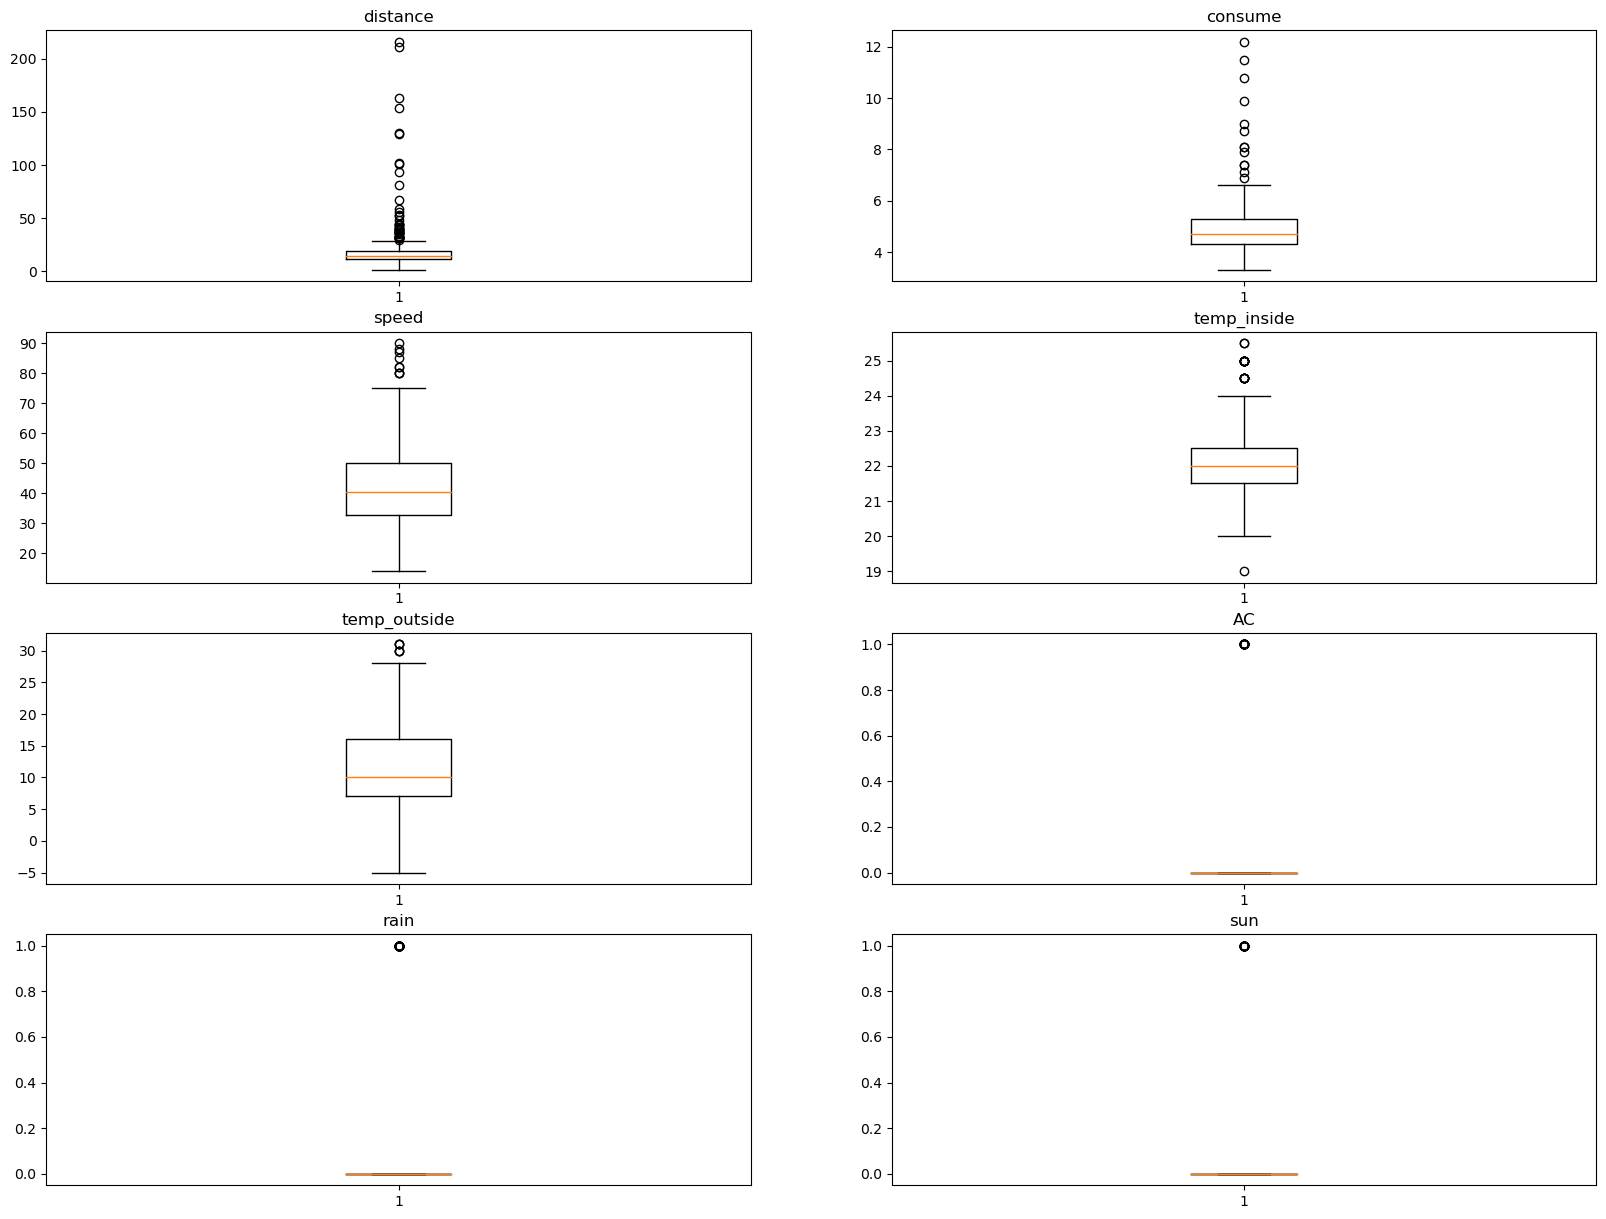

In [21]:
#checking outliers in numerical data
fig, axs = plt.subplots(4,2, figsize=(20,15))

axs[0, 0].boxplot(df['distance'])
axs[0, 1].boxplot(df['consume'])
axs[1, 0].boxplot(df['speed'])
axs[1, 1].boxplot(df['temp_inside'])
axs[2, 0].boxplot(df['temp_outside'])
axs[2, 1].boxplot(df['AC'])
axs[3, 0].boxplot(df['rain'])
axs[3, 1].boxplot(df['sun'])

axs[0, 0].title.set_text('distance')
axs[0, 1].title.set_text('consume')
axs[1, 0].title.set_text('speed')
axs[1, 1].title.set_text('temp_inside')
axs[2, 0].title.set_text('temp_outside')
axs[2, 1].title.set_text('AC')
axs[3, 0].title.set_text('rain')
axs[3, 1].title.set_text('sun')
plt.show()

it looks like there are too many outliers in distance, consume, speed, and temp_inside.Therefore we decide not to remove outliers. As removing a lot of outliers will take away a bigger chunk of data. AC, rain,and sun are cateogorical variables who have either 1 or zero value. 

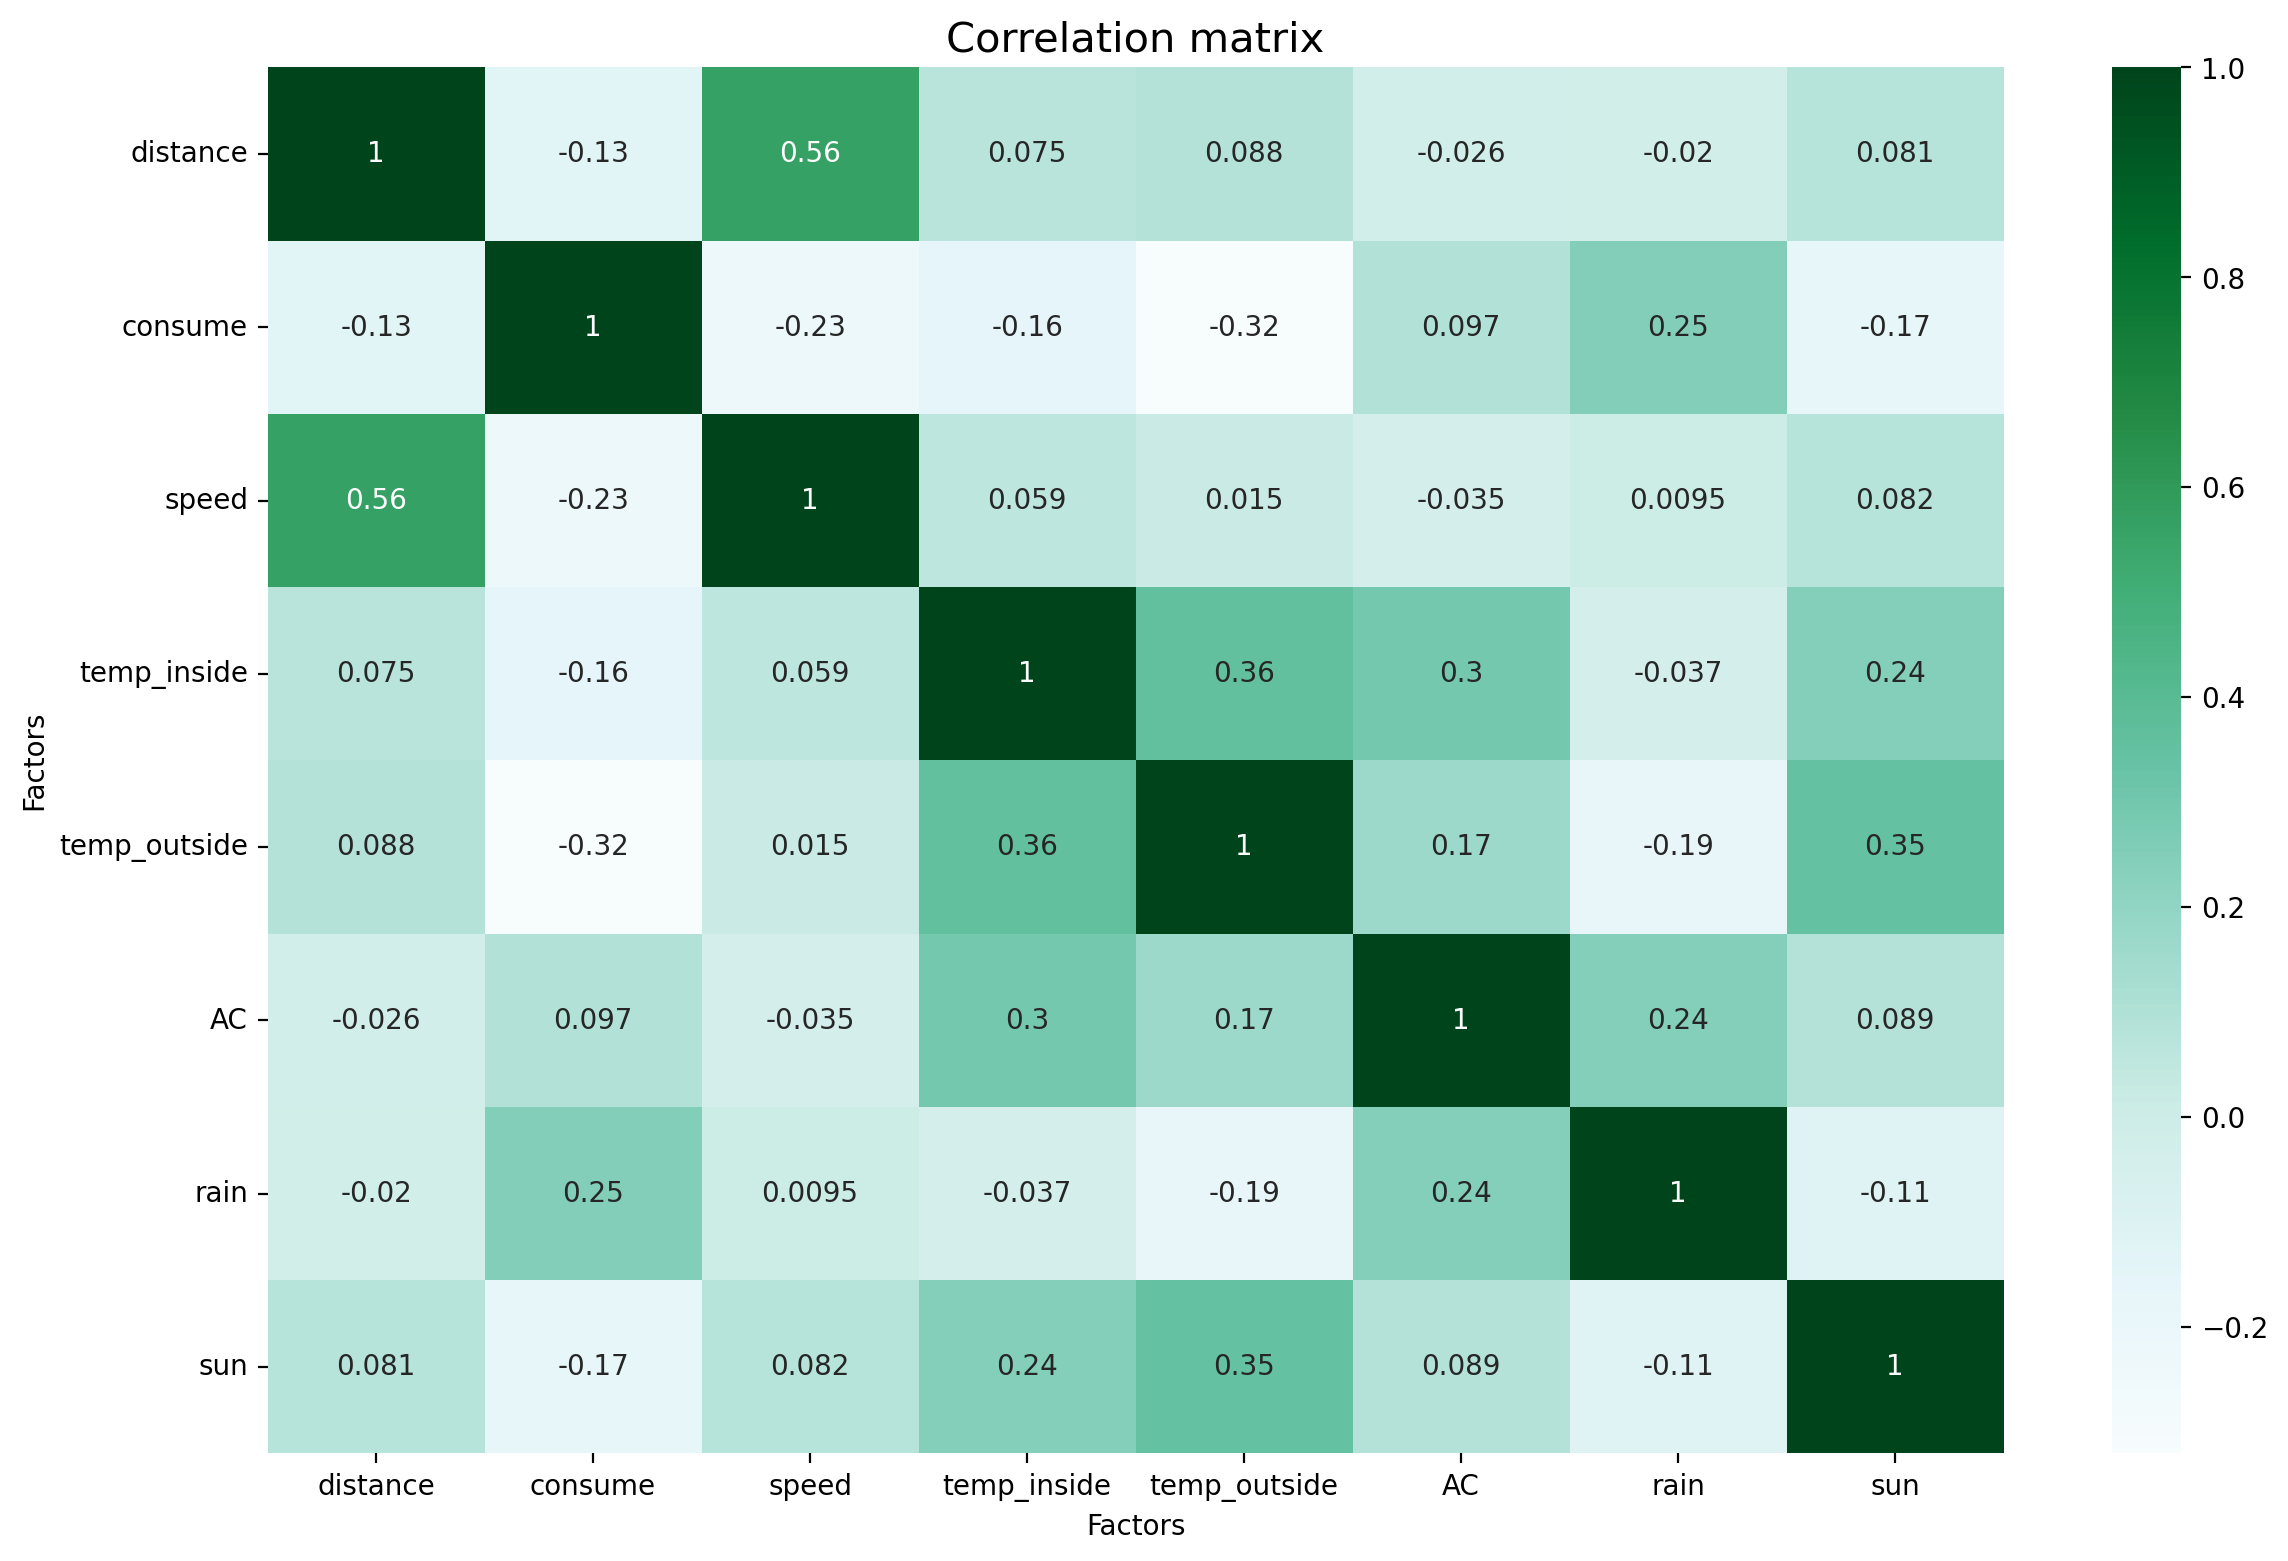

In [22]:
#Correlation matrix
fig, ax = plt.subplots(1, 1, figsize=(14, 9), dpi=200)
sns.heatmap(df.corr(), annot=True,cmap='BuGn')
ax.set(xlabel='Factors')
ax.set(ylabel='Factors')

plt.title('Correlation matrix', fontsize = 15, c='black')
plt.show()

None of the variables seems to be highly correlated with each other, except speed and distance where relation is greater than 50%. So we conclude there is no multicollinearity in the variables.

    In order to answer following questions:
        1. factors effecting gas consumption
        2. Does the type of gas used matter in terms of fuel consumption?
        3. Which fuel is the most cost effective? 
    we will perform some visulizations

##  Data Visualization

Text(32.87673611111112, 0.5, 'consume [l/100km]')

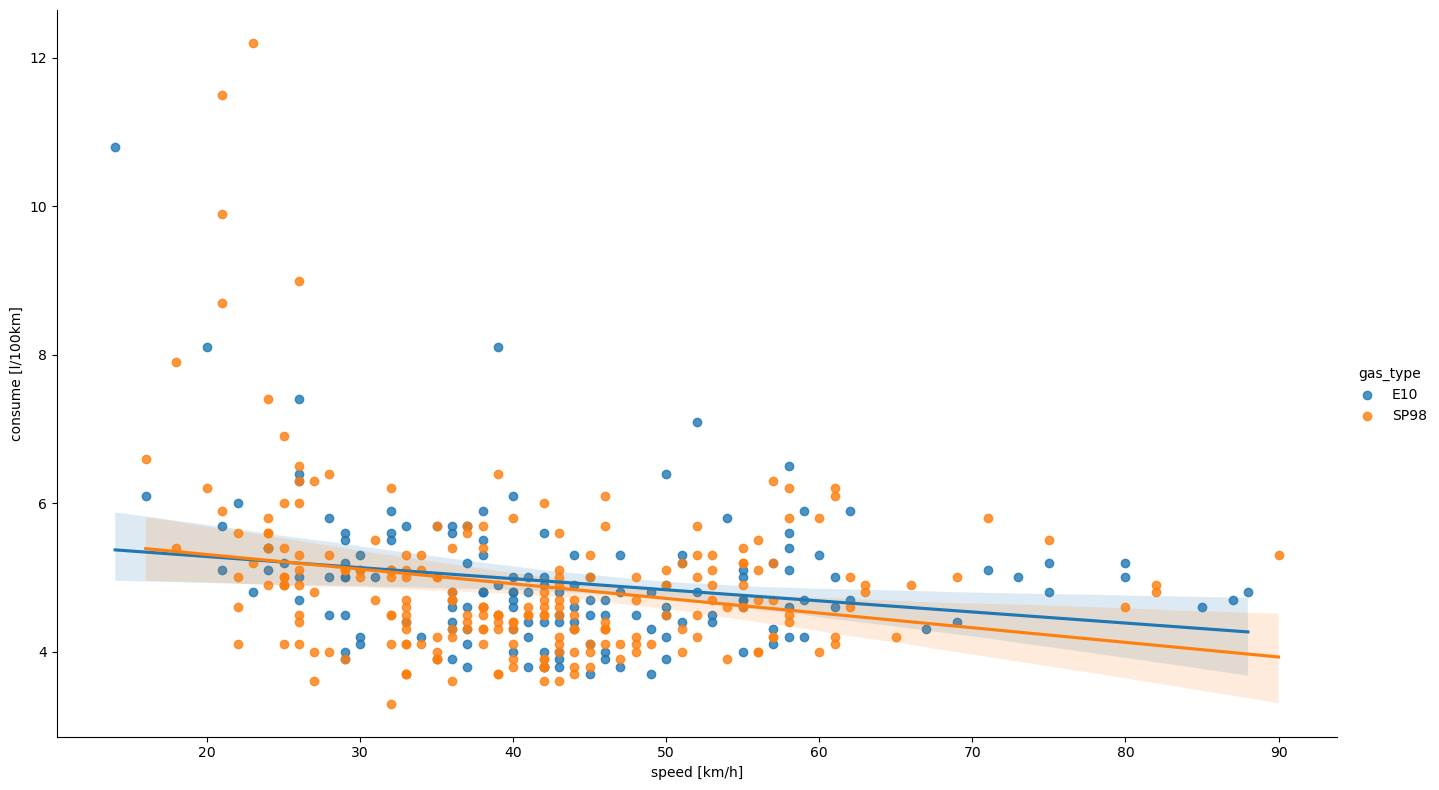

In [23]:
sns.lmplot(data=df, x = 'speed',y =  'consume',hue = 'gas_type', height=8, aspect=1.7)
plt.xlabel('speed [km/h]')
plt.ylabel('consume [l/100km]')

In [24]:
df.to_csv("Challenge")

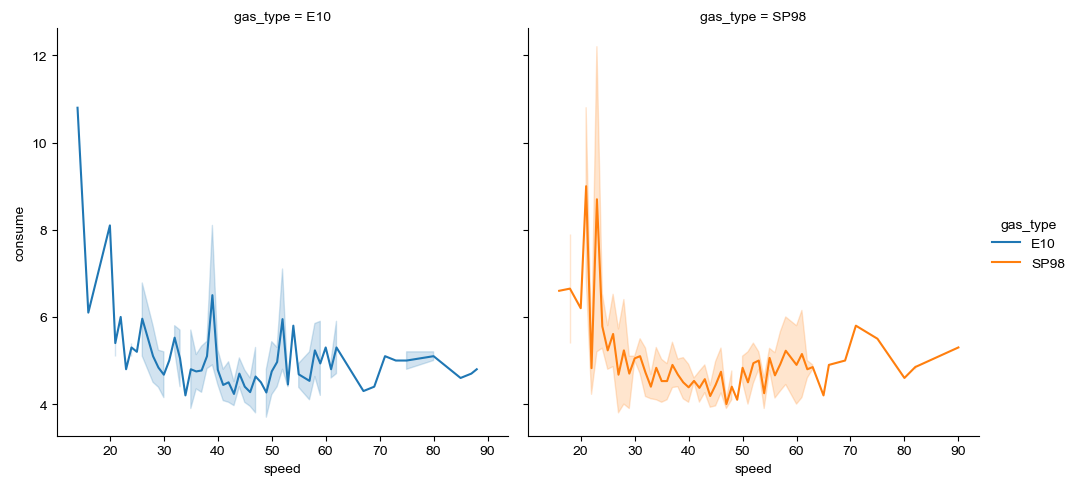

In [25]:
sns.relplot(x="speed", y="consume", kind="line",hue = 'gas_type', col = 'gas_type',data=df)
sns.set_style("white")
plt.xlabel("speed")
plt.ylabel("Fuel consumption dependence on speed")
plt.show()

Text(30.57393790849673, 0.5, 'consume [l/100km]')

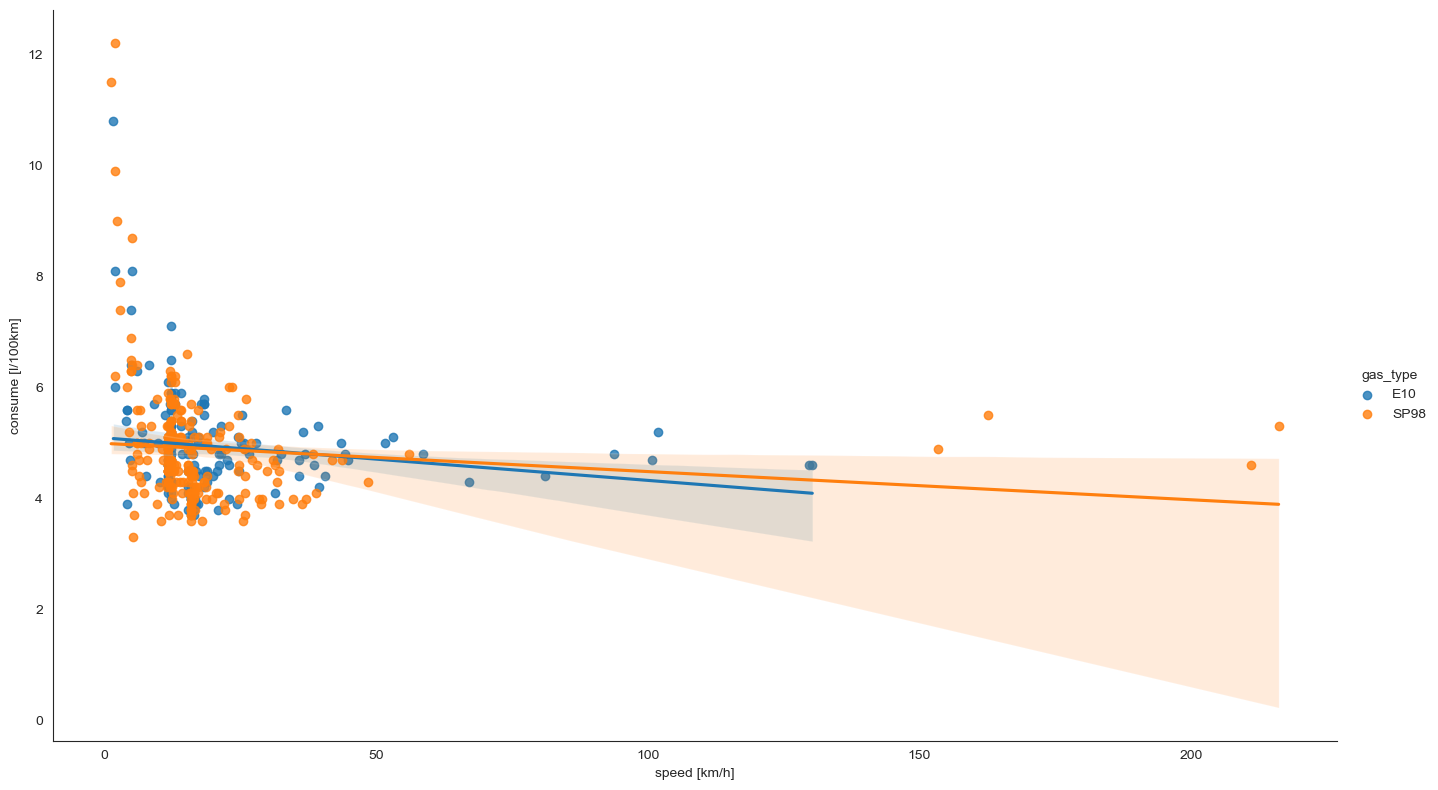

In [26]:
sns.lmplot(data=df, x = 'distance',y =  'consume',hue = 'gas_type', height=8, aspect=1.7)
plt.xlabel('speed [km/h]')
plt.ylabel('consume [l/100km]')

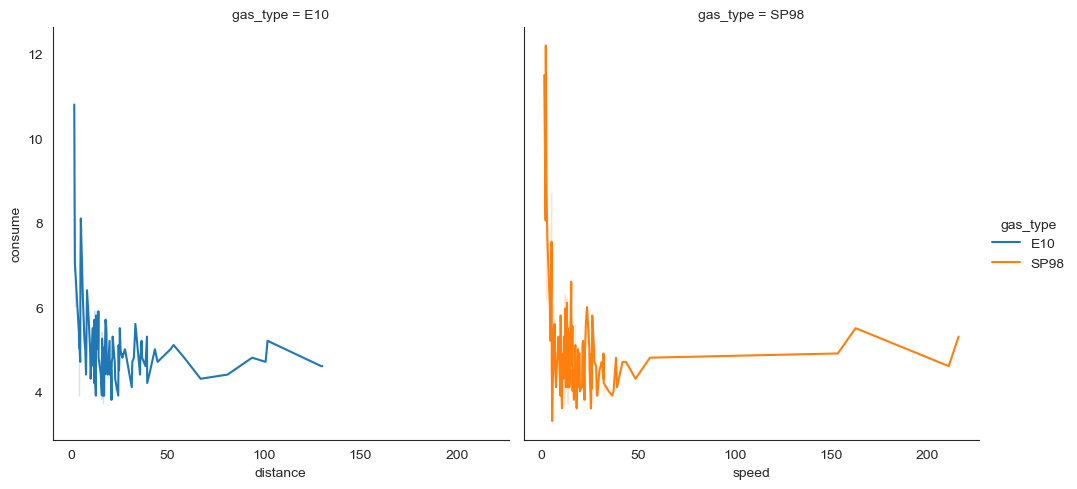

In [27]:
sns.relplot(x="distance", y="consume", kind="line",hue = 'gas_type', col = 'gas_type',data=df)
sns.set_style("white")
plt.xlabel("speed")
plt.ylabel("Fuel consumption dependence on speed")
plt.show()

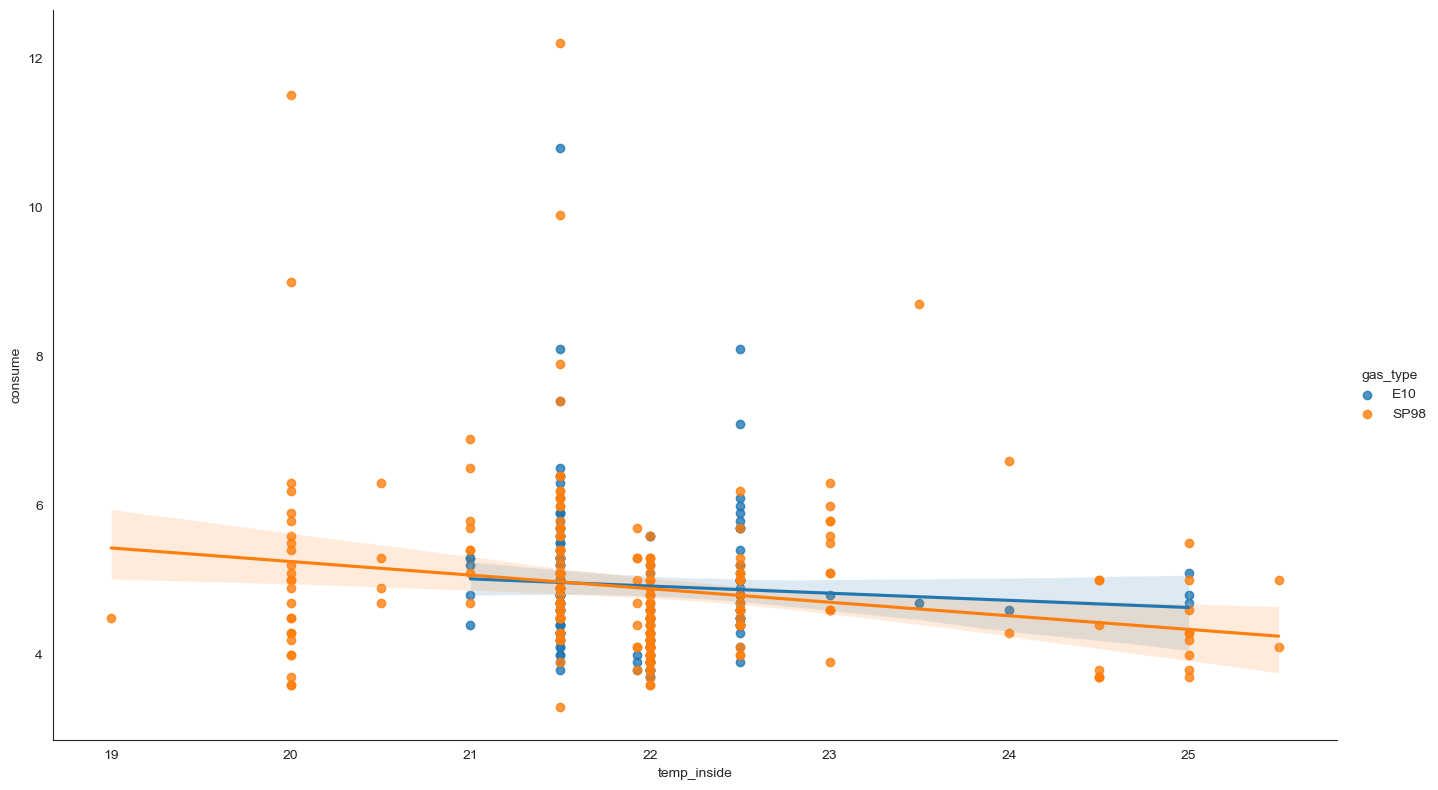

In [28]:
sns.lmplot(data=df, x = 'temp_inside',y =  'consume',hue = 'gas_type', height=8, aspect=1.7)

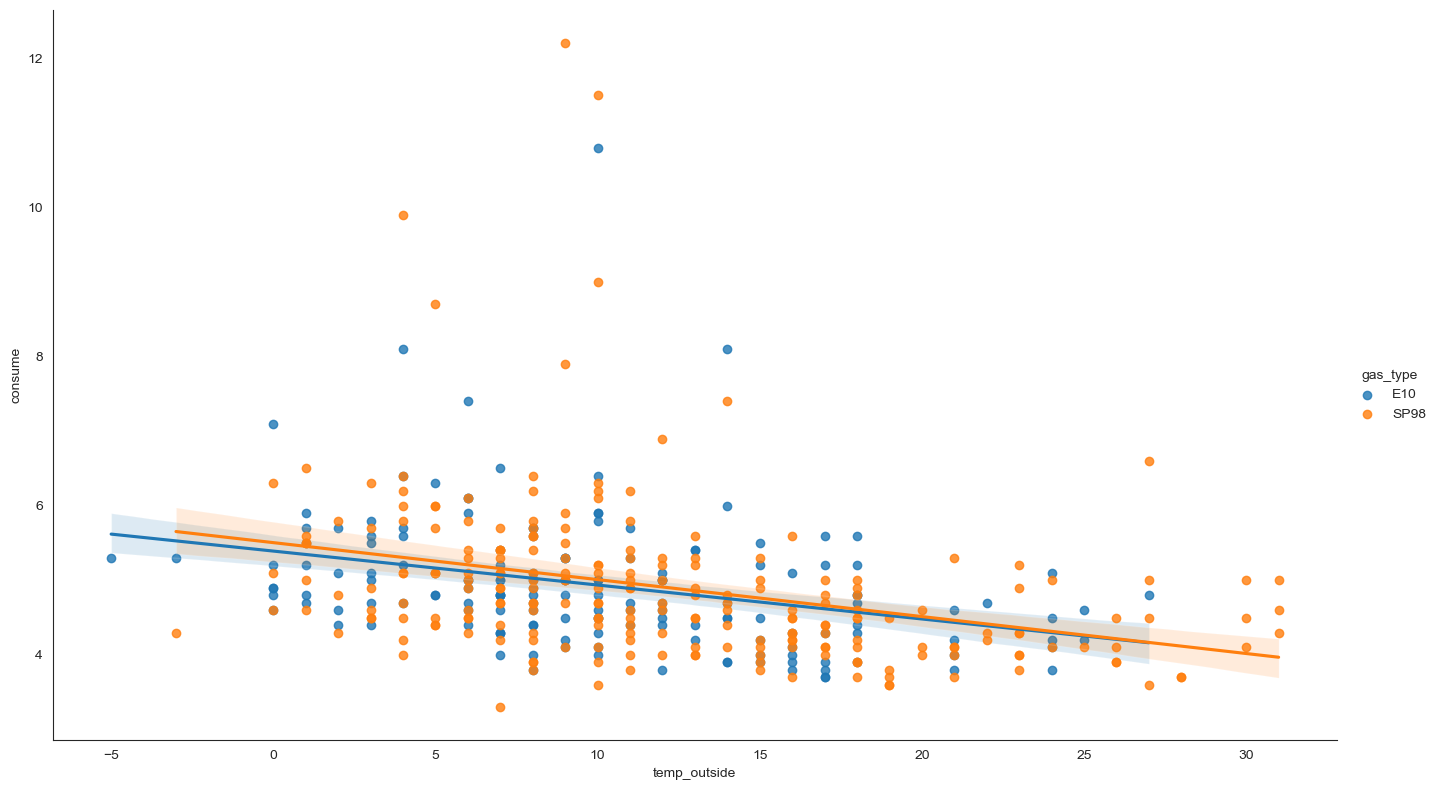

In [29]:
sns.lmplot(data=df, x = 'temp_outside',y =  'consume',hue = 'gas_type', height=8, aspect=1.7)

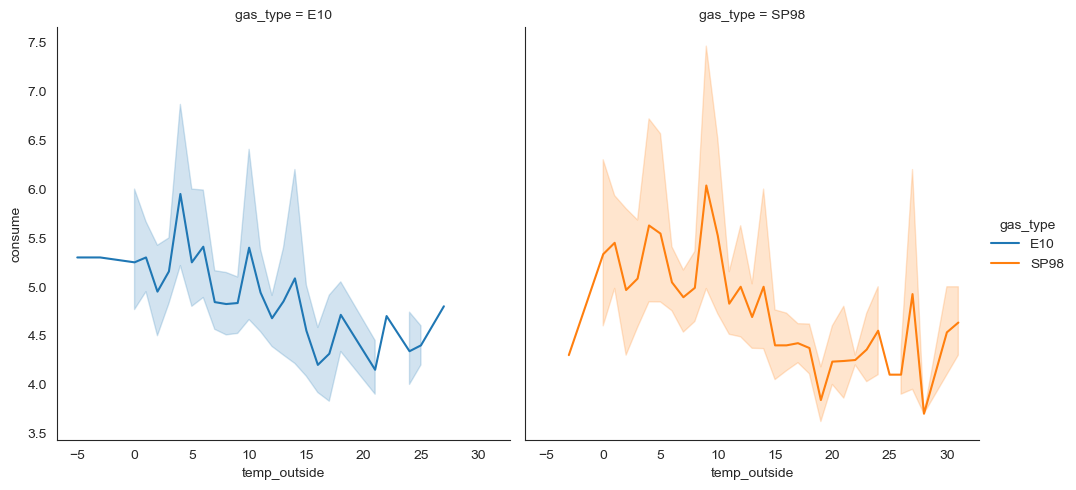

In [30]:
sns.relplot(x="temp_outside", y="consume", kind="line",hue = 'gas_type', col = 'gas_type',data=df)
sns.set_style("white")
plt.xlabel("temp_outside")
plt.ylabel("Fuel consumption dependence on speed")
plt.show()

We can notice linear inverse relationship of fuel consumption with speed and temp_outside but not very strong relationship with other factors (all points in regplot are scattered).

##  Conclusions:

From visualizing the data we can notice that consumption is lower at higher speeds and higher temperature outside, suggesting that:
1. We can notice linear inverse relationship of fuel consumption with speed and temp_outside but not very strong relationship with other factors (all points in regplot are scattered around the estimated line).
2. cobify should increase its prices when temperature is high
3. Drivers should use high speed as much as is possible to safe.
4. Can't observe any significance differences b/w two gas_types

# Predictions

As the price of E10 is less than SP98, that led us assume that E10 has higher consumption than SP98. We will test hypothesis.

    H0: E10(price = 1.38€) does not have statistically significantly higher consumption than SP98(price = 1.46€).
    H1 =E10(price = 1.38€) does have statistically significantly higher consumption than SP98.

In [32]:
E10=df[df["gas_type"]=="E10"].consume
SP98=df[df["gas_type"]=="SP98"].consume

In [39]:
from statsmodels.stats.weightstats import ztest as ztest
ztest(E10,SP98, alternative = "larger") 

(0.3011626300254617, 0.3816452423051032)

Since this p-value is less than .05, we have sufficient evidence to reject the null hypothesis. In other words, the mean E10 has statisticall significant higher consumption than SP98.

We will try to built a model and use these features to make a predictions for gas_type, and will try to understand which features are important to distinguish b/w two gases.

In [40]:
y = df['gas_type'] #set y
X = df.drop(['gas_type'], axis = 1) 
X

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun
0,28.0,5.0,26,21.5,12,0,0,0
1,12.0,4.2,30,21.5,13,0,0,0
2,11.2,5.5,38,21.5,15,0,0,0
3,12.9,3.9,36,21.5,14,0,0,0
4,18.5,4.5,46,21.5,15,0,0,0
...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,0,0,0
384,16.1,4.3,38,25.0,31,1,0,0
385,16.0,3.8,45,25.0,19,0,0,0
386,15.4,4.6,42,25.0,31,1,0,0


In [41]:
y.value_counts()

SP98    228
E10     160
Name: gas_type, dtype: int64

as data is imbalanced, therefore we will try to calculate f1_macro.

In [42]:
#train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state=42)

In [43]:
kfold = StratifiedKFold(n_splits=10)

In [44]:
# Modeling step Test different algorithms.


random_state = 42
classifiers1 = SVC(random_state = random_state)
classifiers2 = DecisionTreeClassifier(random_state = random_state)
classifiers3 = AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1)
classifiers4=  RandomForestClassifier(random_state = random_state)
classifiers5 = GradientBoostingClassifier(random_state=random_state)
classifiers6 = KNeighborsClassifier()
classifiers7 = LogisticRegression(random_state = random_state)
classifiers8 = GaussianNB()


model_pipeline = [classifiers1, classifiers2,classifiers3,classifiers4, classifiers5,classifiers6, classifiers7, classifiers8]

train_score = []
test_score = []
F1_macro = []
Fbeta_half = []
Fbeta_two = []
cv_results = []


 
for classifiers in model_pipeline:
    classifiers.fit(X_train, y_train)
    y_predict_train = classifiers.predict(X_train)
    y_predict_test = classifiers.predict(X_test)
    train_score.append(accuracy_score(y_train, y_predict_train))
    test_score.append(accuracy_score(y_test, y_predict_test))
    F1_macro.append(f1_score(y_test,y_predict_test,average='macro'))
    Fbeta_half.append(fbeta_score(y_test,y_predict_test,average='macro', beta = 0.5))    
    Fbeta_two.append(fbeta_score(y_test,y_predict_test,beta= 1.5,average='macro'))
    cv_results.append(np.mean(cross_val_score(classifiers,X_train,y_train, scoring = "accuracy", cv = kfold, n_jobs =4)))

In [45]:
summary = {'Train Score':train_score,
           'Test Score':test_score,
           'cv_results':cv_results,
            #'precision_score': precision,
            #'recall_score':recall,
            'F1_macro': F1_macro,
           'Fbeta_half':Fbeta_half,
           'Fbeta_two':Fbeta_two
              }
summary = pd.DataFrame(summary).T
summary.columns = 'SVC', 'DecisionTreeClassifier', 'AdaBoostClassifier','RandomForestClassifier','GradientBoostingClassifier','KNeighborsClassifier', 'LogisticRegression','GaussianNB'
summary

,SVC,DecisionTreeClassifier,AdaBoostClassifier,RandomForestClassifier,GradientBoostingClassifier,KNeighborsClassifier,LogisticRegression,GaussianNB
Train Score,0.635484,1.000000,1.000000,1.000000,0.919355,0.732258,0.638710,0.590323
Test Score,0.538462,0.743590,0.705128,0.692308,0.705128,0.576923,0.551282,0.615385
cv_results,0.625806,0.577419,0.574194,0.648387,0.667742,0.580645,0.629032,0.561290
F1_macro,0.350000,0.740864,0.702734,0.678792,0.693804,0.560676,0.453453,0.608957
Fbeta_half,0.296610,0.741812,0.703059,0.689286,0.702913,0.565295,0.472353,0.622474
Fbeta_two,0.395652,0.740445,0.702571,0.676777,0.691819,0.560746,0.467954,0.610547


most of the models are overfitting, We will take GradientBoostingClassifier as it is less overfitting and having better results compared to other models

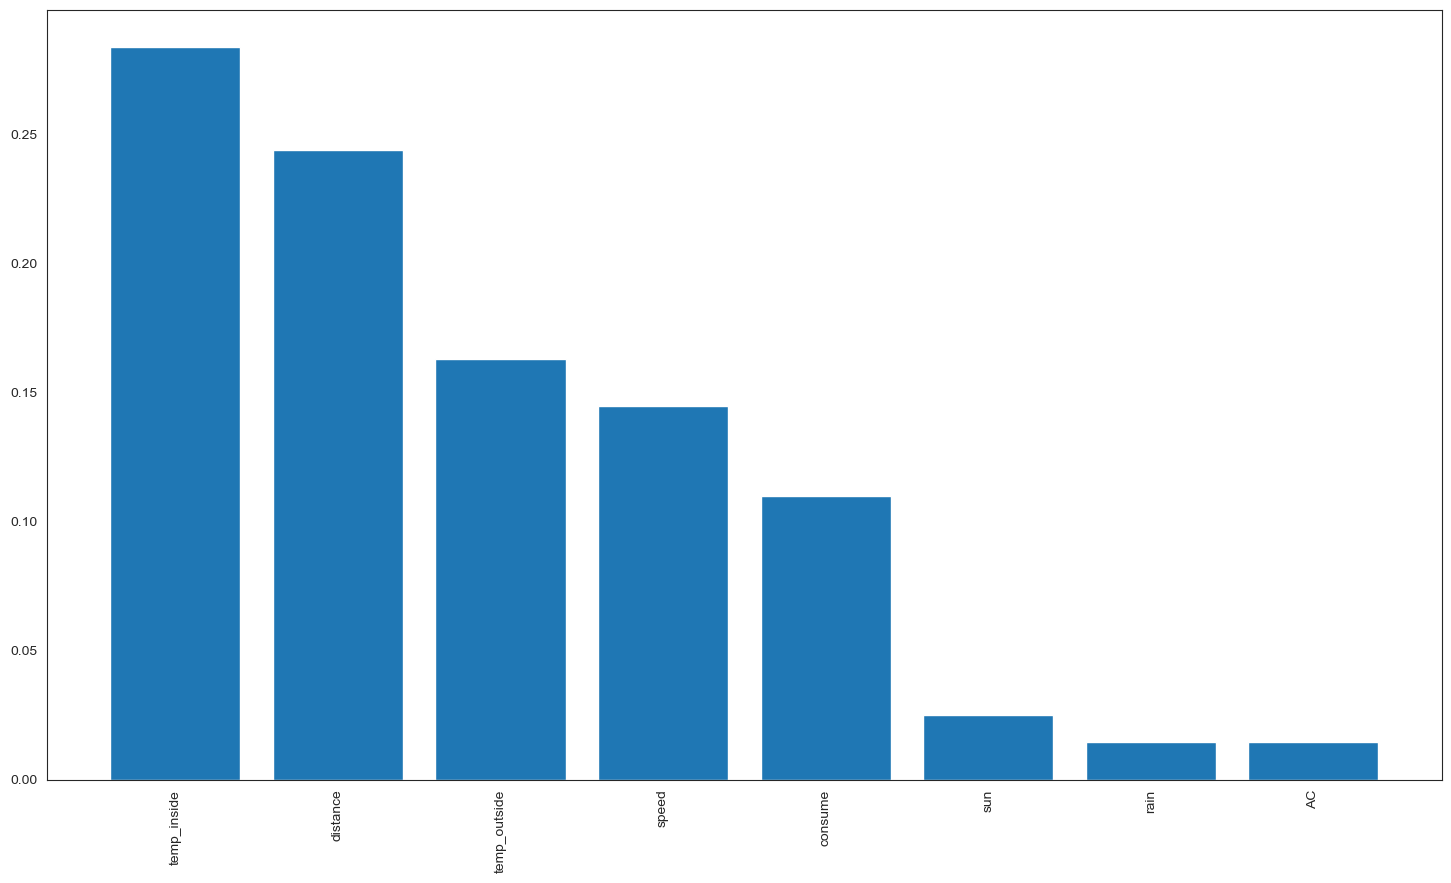

In [46]:
clf = GradientBoostingClassifier(random_state=random_state)
clf.fit(X_train, y_train)
importances = clf.feature_importances_
sorted_index = np.argsort(importances)[::-1]
x= range(len(importances))

labels = np.array(X_train.columns)[sorted_index]
f, ax = plt.subplots(figsize=(18,10))
plt.bar(x, importances[sorted_index],tick_label = labels)

plt.xticks(rotation = 90)
plt.show()


In [47]:
import shap

In [48]:
shap_values = shap.TreeExplainer(clf).shap_values(X_train)

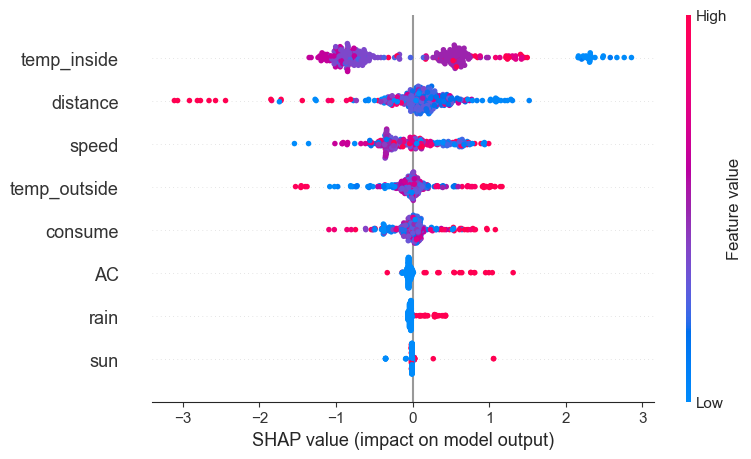

None


In [49]:
print(shap.summary_plot(shap_values, X_train, feature_names=X_train.columns))

    Features namely temp_inside, distance and temp_outside, speed and consume are very important for predicting gas_type used, while sun, rain and AC are less important.
    Shap values shows that features temp_inside and speed has positive impact on model, while distance has more negative impact. Lower temp_inside has negative impact while higher distance also have negative impact, so on and so forth.

### Next Steps:
        For getting more concreate results combify can try to collect more data for different auto-types, engines, tpyes of roads used to find one optimal solution. 